In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Admin\Downloads\Titanic_train.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(df.isnull().sum())
print(df.isnull().mean())  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


<Axes: xlabel='Survived', ylabel='count'>

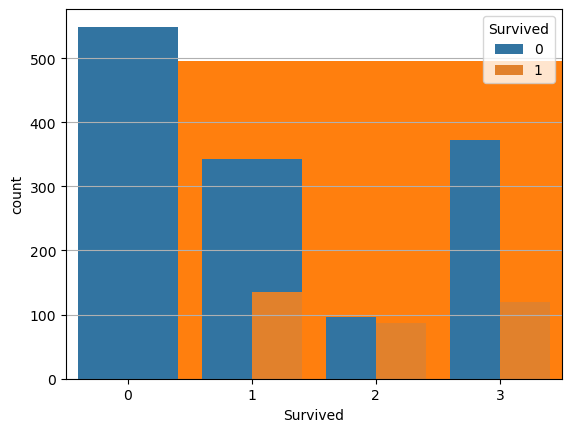

In [7]:
df['Age'].hist(bins=30)
df['Fare'].hist(bins=30)
sns.countplot(x='Survived', data=df)
sns.countplot(x='Pclass', hue='Survived', data=df)


<Axes: xlabel='Pclass', ylabel='Survived'>

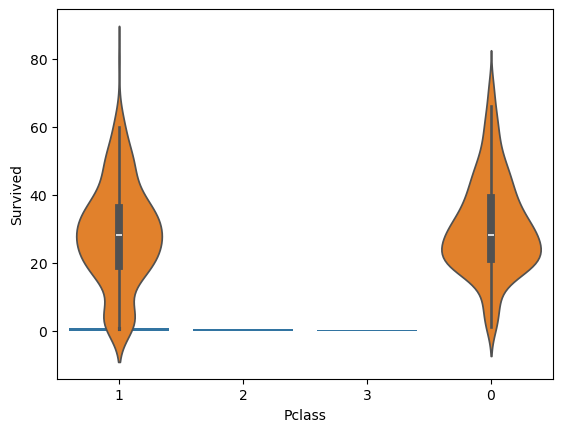

In [8]:
sns.barplot(x='Pclass', y='Survived', data=df)
sns.violinplot(x='Survived', y='Age', data=df)


<Axes: >

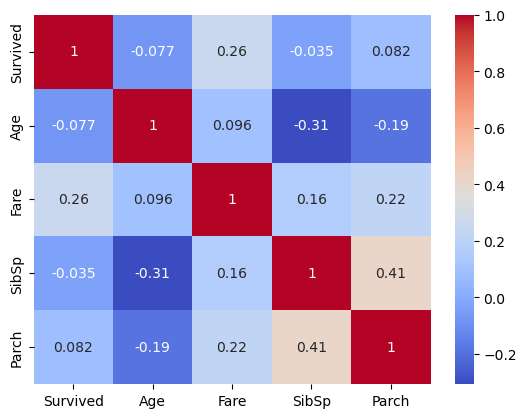

In [9]:
correlation = df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
#dropping cabin as it has too many missing values

In [12]:
df.drop(columns=["Cabin"],inplace=True)

In [14]:
# One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Label encoding for 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


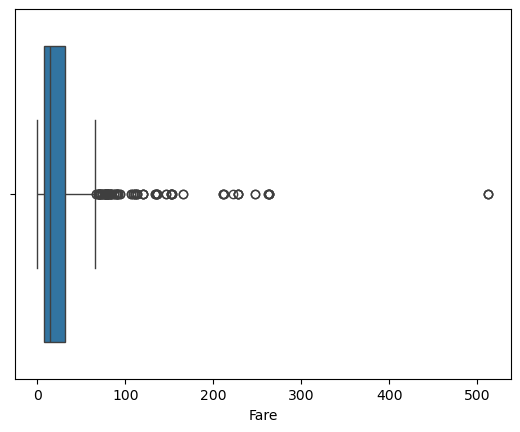

In [15]:
sns.boxplot(x=df['Fare'])
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [18]:
X = df.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']
print(X.head()) 
print(y.head())  

   PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0            1       3    0 -0.528321      1      0 -0.779117       False   
2            3       3    1 -0.215182      0      0 -0.729373       False   
3            4       1    1  0.489381      1      0  2.599828       False   
4            5       3    0  0.489381      0      0 -0.720161       False   
5            6       3    0 -0.058613      0      0 -0.690071        True   

   Embarked_S  
0        True  
2        True  
3        True  
4        True  
5       False  
0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report) 


Accuracy: 0.7483870967741936
Confusion Matrix:
[[81 14]
 [25 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81        95
           1       0.71      0.58      0.64        60

    accuracy                           0.75       155
   macro avg       0.74      0.72      0.72       155
weighted avg       0.74      0.75      0.74       155



Accuracy: 0.75
Precision: 0.71
Recall: 0.58
F1-Score: 0.64
ROC-AUC Score: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.81        95
           1       0.71      0.58      0.64        60

    accuracy                           0.75       155
   macro avg       0.74      0.72      0.72       155
weighted avg       0.74      0.75      0.74       155



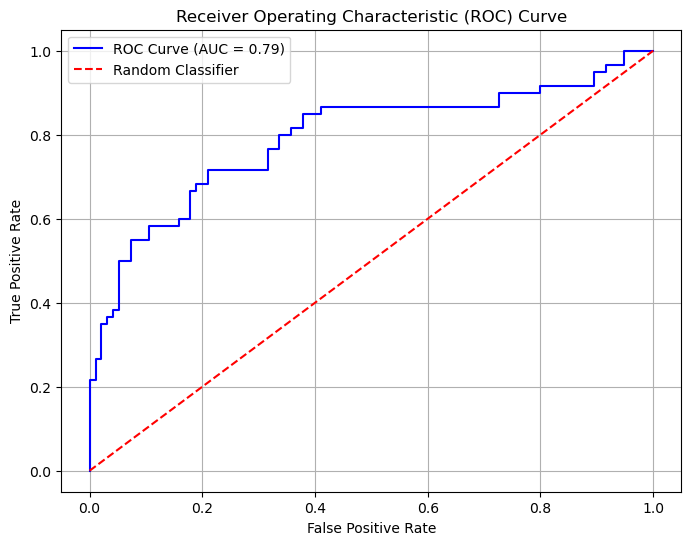

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] 


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


In [23]:
#Extracting and interpriting the coefficients


feature_names = X_train.columns
coefficients = model.coef_[0]
intercept = model.intercept_[0]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
})


coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

print("Intercept:", intercept)
print("\nCoefficients and Odds Ratios:")
print(coef_df)


Intercept: 1.0775011514908357

Coefficients and Odds Ratios:
       Feature  Coefficient  Odds Ratio
2          Sex     2.599555   13.457754
1       Pclass    -0.975102    0.377154
3          Age    -0.598406    0.549687
4        SibSp    -0.541856    0.581667
6         Fare     0.260912    1.298114
8   Embarked_S    -0.219094    0.803246
7   Embarked_Q     0.134013    1.143408
5        Parch    -0.051242    0.950049
0  PassengerId    -0.000105    0.999895


In [24]:
#interpretitions

In [ ]:
"""
Most Significant Predictors of Survival:

Sex (female): Being female has the strongest positive impact on survival.
Pclass: Higher class significantly improves odds of survival.
Negative Predictors of Survival:

Age: Older individuals were less likely to survive.
SibSp: Larger family sizes (siblings/spouses) reduced survival odds.
Slight Impact Features:

Fare: Positive but smaller impact compared to Sex and Pclass.
Embarked: Location of embarkation had a minor influence.
"""